<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Numerical Solutions (Good)</span></div>

## 1 Differential Equations and Euler

### 1.2 What do we mean by changes?

In [21]:
import numpy as np
import os
import glob
import shutil
import math
from matplotlib import pyplot as plt
import numpy.random as rnd
from scipy.integrate import odeint

In [ ]:

# Your code here


### 1.3 Calculus: Meaning and Notation

In [ ]:

# Your code here


### 1.4 Calculus: Getting a feel for \(\dfrac{dN}{dt}\)

In [ ]:

# Your code here


### 1.5 Solving Differential Equations

In [ ]:

# Your code here


### 1.6 The Euler Method

In [ ]:

# Your code here


### 1.7 Using Euler for the logistic equation

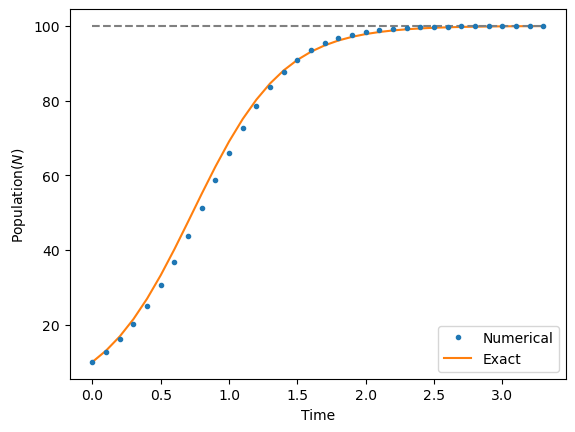

In [2]:
def logistic(time, N0, carrying_capacity, rate):
    
    # This outputs the exact solution to the logistic differential equation
    
    C = 1/N0-1/carrying_capacity
    output = (1+C*carrying_capacity*np.exp(-rate*time))
    output = carrying_capacity/output
    return output

N_stop_difference = 1E-2 # Stop running if the change in population btw consecutive runs is less than this value

dt = .1
N0, K, rate = 10, 100, 3
data = {'time':[], 'N':[]}
time, N = 0, N0

while True:
    data['time'].append(time)
    data['N'].append(N)
    
    dN = rate*N*(1-N/K)*dt
    N += dN
    time += dt
    
    # Should we stop the loop
    try:
        # The lists start empty so the following will raise an error the first two rounds. 'try' will get us around it
        if np.abs(data['N'][-1]-data['N'][-2]) <= N_stop_difference:
            break
    except IndexError:
        # checking list if there is an error even when list has more than 2 elements
        if len(data['N']) < 2:
            pass
        else:
            print('Trouble')
            quit()
            
exact_data = logistic(time = np.array(data['time']), N0 = N0, carrying_capacity = K, rate = rate)

plt.plot(data['time'], data['N'], '.', label = 'Numerical')
plt.plot(data['time'], exact_data, label = 'Exact', zorder = 1) # zorder pushes the plot back
plt.legend(loc = 'lower right')
plt.ylabel('Population($N$)')
plt.xlabel('Time')
plt.hlines(K, 0, data['time'][-1], colors = 'grey', ls = 'dashed', zorder = 1) # zorder pushes the plot back


### 1.8 Some things to note about the code

## 2 Coupled Differential Equations: Predator-Prey Model

### 2.1 The equations

In [ ]:

# Your code here


### 2.2 Example code

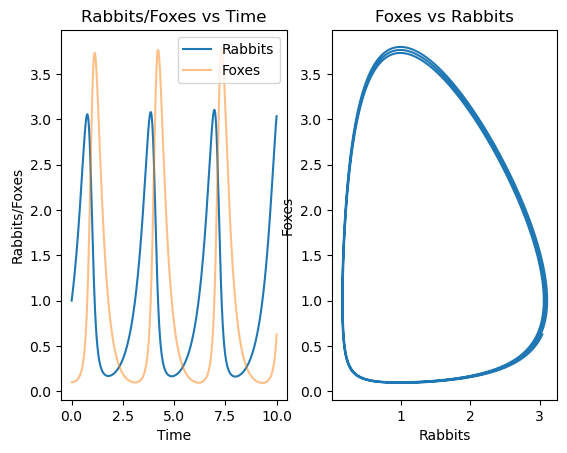

In [3]:
max_time = 10
dt = 0.001
rabbits0 = 1
foxes0 = 0.1
time = 0
rabbits = rabbits0
foxes = foxes0
data = []

# Lotka-Volterra equations

def drabbits_dt(rabbits, foxes):
    a = 2
    b = 2
    return a*rabbits - b*rabbits*foxes

def dfoxes_dt(rabbits, foxes):
    d = 3
    g = 3
    return d*foxes*rabbits - g*foxes

while True:
    data.append([time, rabbits, foxes])
    
    rabbits_new = rabbits + drabbits_dt(rabbits, foxes)*dt
    
    foxes += dfoxes_dt(rabbits, foxes)*dt
    
    rabbits = rabbits_new
    
    time += dt
    
    if time > max_time:
        break
        
data = np.array(data)
data = {'time': data[:, 0], 'rabbits': data[:, 1], 'foxes': data[:, 2]}

fig, ax = plt.subplots(nrows = 1, ncols = 2)
ax_with_time, ax_with_other = ax


# Plotting individual species
ax_with_time.plot(data['time'], data['rabbits'], label = 'Rabbits')
ax_with_time.plot(data['time'], data['foxes'], label = 'Foxes', alpha = .5)
ax_with_time.set_ylabel('Rabbits/Foxes')
ax_with_time.set_xlabel('Time')
ax_with_time.set_title(f'Rabbits/Foxes vs Time')
ax_with_time.legend()

# Plotting one against the other
ax_with_other.plot(data['rabbits'], data['foxes'])
ax_with_other.set_xlabel('Rabbits')
ax_with_other.set_ylabel('Foxes')
ax_with_other.set_title(f'Foxes vs Rabbits')

plt.show()

In [ ]:

# Your code here


### 2.3 Some things to note about the code

In [ ]:

# Your code here


## 3 Hello SciPy

### 3.1 SciPy odeint()

### 3.2 Radioactivity

ValueError: x and y must have same first dimension, but have shapes (1,) and (50, 1)

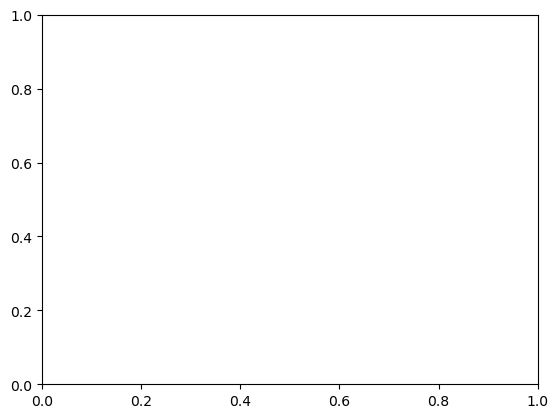

In [16]:
max_time = .05
dt = .001
decay_constant = 142
N0 = 1
# For 85 Rb (per Myr)
# STarting value of N (in billions of atoms)

def dNdt(N, time, decay_constant):
    # Function for the derivative
    return - decay_constant*N

all_time = np.arange(0, max_time, dt)

all_N = odeint(y0 = [N0], func = dNdt, t = all_time, args = (decay_constant,)) # Any arguments to dNdt

plt.plot(time, all_N)
# plt.plot(data['time'], exact_data, label = 'Exact', zorder = 1) # zorder pushes the plot back
# plt.legend(loc = 'lower right')
plt.ylabel('N')
plt.xlabel('Time (Millions of years)')

plt.show()

In [ ]:

# Your code here


### 3.3 Logistic Equation

NameError: name 'exact_data' is not defined

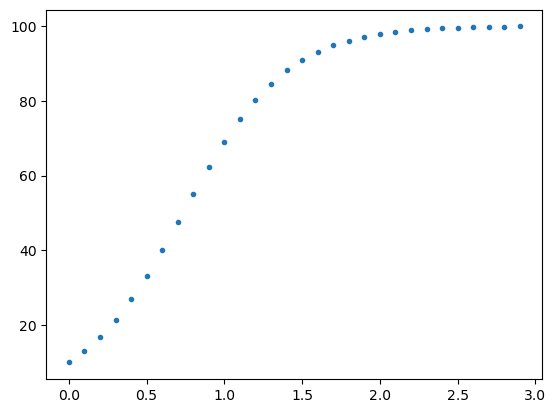

In [17]:
def dNdt(N, time, rate, carrying_capacity):
    return rate*N*(1-N/carrying_capacity)

max_time, dt = 3, .1
N0, K, rate = 10, 100, 3

data = {}
data['time'] = np.arange(0, max_time, dt)
data['N'] = odeint(dNdt, N0, data['time'], (rate, K))

plt.plot(data['time'], data['N'], '.', label = 'Numerical')
plt.plot(data['time'], exact_data, label = 'Exact', zorder = 1) # zorder pushes the plot back
plt.legend(loc = 'lower right')
plt.ylabel('Population($N$)')
plt.xlabel('Time')
plt.hlines(K, 0, data['time'][-1], colors = 'grey', ls = 'dashed', zorder = 1) # zorder pushes the plot back

plt.show()

### 3.4 Predator-Prey

In [18]:
max_time = 10
dt = .001
rabbits0, foxes0 = 1, .1

#Lotka-Volterra eqns
def dy_dt(y, t):
    # Function for the derivative
    # y contains all the variables for the simulation
    # t is the dependent variable
    
    rabbits, foxes = y
    
    # Rabbits
    a, b = 2, 2
    drabbits_dt = a*rabbits - b*rabbits*foxes
    
    # Foxes
    d, g = 3, 3
    d_foxes_dt = d*foxes*rabbits - g*foxes
    
    return [drabbits_dt, dfoxes_dt]

data = {}
data['time'] = np.arange(0, max_time, dt)

# Look at order of passing rabbit and fox info
results = odeint(y0 = [rabbits0, foxes0], func = dy_dt, t = data['time'])

data['rabbits'] = results[:, 0]
data['foxes'] = results[:, 1]

# Plotting individual species
ax_with_time.plot(data['time'], data['rabbits'], label = 'Rabbits')
ax_with_time.plot(data['time'], data['foxes'], label = 'Foxes', alpha = .5)
ax_with_time.set_ylabel('Rabbits/Foxes')
ax_with_time.set_xlabel('Time')
ax_with_time.set_title(f'Rabbits/Foxes vs Time')
ax_with_time.legend()

# Plotting one against the other
ax_with_other.plot(data['rabbits'], data['foxes'])
ax_with_other.set_xlabel('Rabbits')
ax_with_other.set_ylabel('Foxes')
ax_with_other.set_title(f'Foxes vs Rabbits')

plt.show()

TypeError: float() argument must be a string or a number, not 'function'

## Exercise 1 :  The Lorentz Attaractor

In [2]:
gamma = 8/3
gamma

2.6666666666666665

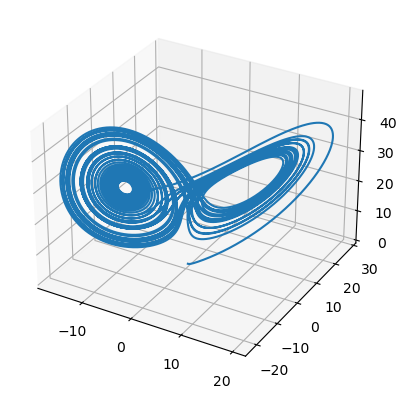

In [17]:
# CORRECT CODE odeint()

x_0, y_0, z_0 = 0, 1, 0
max_time = 50
dt = .001
sigma = 10
rho = 28
beta = 8/3

def lorentz(a, t, sigma, rho, beta):
    x, y, z = a
    dxdt = sigma*(y-x)
    dydt = (x*(row - z))-y
    dzdt = (x*y) - (beta*z)
    dadt = [dxdt, dydt, dzdt]
    return dadt

# while True:


data['time'] = np.arange(0, max_time, dt)
results = odeint(func = lorentz, y0 = [x_0, y_0, z_0], t = data['time'], args = (sigma, rho, beta))



x1 = [results[i][0] for i in range(len(results))]
y1 = [results[i][1] for i in range(len(results))]
z1 = [results[i][2] for i in range(len(results))]

ax = plt.axes(projection='3d')
ax.plot3D(x1, y1, z1)
plt.show()

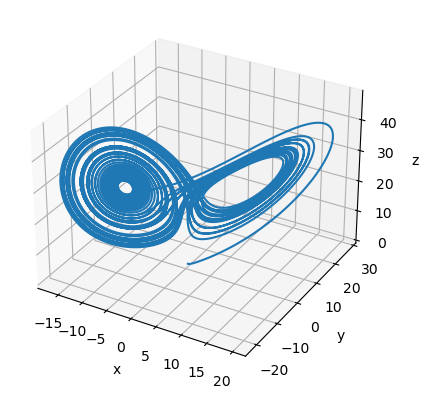

In [24]:
# CORRECT CODE odeint()

x_0, y_0, z_0 = 0, 1, 0
max_time = 50
dt = .001
sigma = 10
rho = 28
beta = 8/3

def lorentz(a, t, sigma, rho, beta):
    x, y, z = a
    dxdt = sigma*(y-x)
    dydt = (x*(row - z))-y
    dzdt = (x*y) - (beta*z)
    dadt = [dxdt, dydt, dzdt]
    return dadt

# while True:


data['time'] = np.arange(0, max_time, dt)
results = odeint(func = lorentz, y0 = [x_0, y_0, z_0], t = data['time'], args = (sigma, rho, beta))



x1 = [results[i][0] for i in range(len(results))]
y1 = [results[i][1] for i in range(len(results))]
z1 = [results[i][2] for i in range(len(results))]

ax = plt.axes(projection='3d')
ax.plot3D(x1, y1, z1)
ax.set_xticks([-15, -10, -5, 0, 5, 10, 15, 20])
ax.set_xlabel('x')
ax.set_yticks([-20, -10, 0, 10, 20, 30])
ax.set_ylabel('y')
ax.set_zticks([0, 10, 20, 30, 40])
ax.set_zlabel('z')
plt.show()

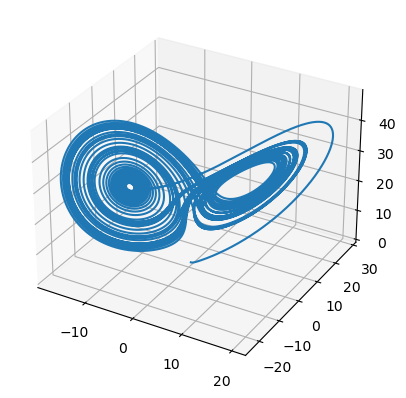

In [20]:
# CORRECT CODE WITHOUT odeint()

x_0, y_0, z_0 = 0, 1, 0
max_time = 50
dt = .001
sigma = 10
rho = 28
beta = 8/3
data = {'x_value': [x_0], 'y_value': [y_0], 'z_value': [z_0]}
time = np.arange(0, max_time, dt)

def dx_dt(x, y): # If not used then no need to input
    dxdt = sigma*(y-x)
    return dxdt

def dy_dt(x, y, z):
    dydt = (x*(rho - z))-y
    return dydt

def dz_dt(x, y, z):
    dzdt = (x*y) - (beta*z)
    return dzdt

x = x_0
y = y_0
z = z_0

for t in time:

    x_new = x + dx_dt(x, y)*dt
    y_new = y + dy_dt(x, y, z)*dt
    z_new = z + dz_dt(x, y, z)*dt
    
    data['x_value'].append(x_new)
    data['y_value'].append(y_new)
    data['z_value'].append(z_new)
    
    x = x_new
    y = y_new
    z = z_new
    

ax = plt.axes(projection='3d')
ax.plot3D(data['x_value'], data['y_value'], data['z_value'])
plt.show()

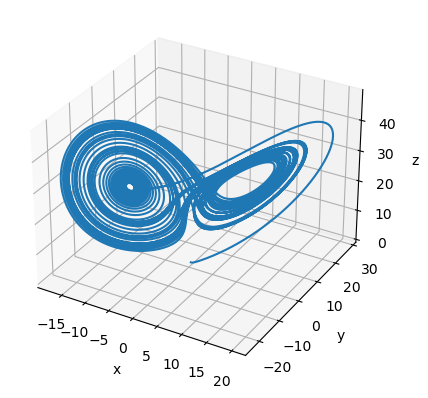

In [23]:
# CORRECT CODE WITHOUT odeint()

x_0, y_0, z_0 = 0, 1, 0
max_time = 50
dt = .001
sigma = 10
rho = 28
beta = 8/3
data = {'x_value': [x_0], 'y_value': [y_0], 'z_value': [z_0]}
time = np.arange(0, max_time, dt)

def dx_dt(x, y): # If not used then no need to input
    dxdt = sigma*(y-x)
    return dxdt

def dy_dt(x, y, z):
    dydt = (x*(rho - z))-y
    return dydt

def dz_dt(x, y, z):
    dzdt = (x*y) - (beta*z)
    return dzdt

x = x_0
y = y_0
z = z_0

for t in time:

    x_new = x + dx_dt(x, y)*dt
    y_new = y + dy_dt(x, y, z)*dt
    z_new = z + dz_dt(x, y, z)*dt
    
    data['x_value'].append(x_new)
    data['y_value'].append(y_new)
    data['z_value'].append(z_new)
    
    x = x_new
    y = y_new
    z = z_new
    

ax = plt.axes(projection='3d')
ax.plot3D(data['x_value'], data['y_value'], data['z_value'])
ax.set_xticks([-15, -10, -5, 0, 5, 10, 15, 20])
ax.set_xlabel('x')
ax.set_yticks([-20, -10, 0, 10, 20, 30])
ax.set_ylabel('y')
ax.set_zticks([0, 10, 20, 30, 40])
ax.set_zlabel('z')
plt.show()